In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Load data for various subjects

# file path is parent directory to have a directory called 'data' that the data was unzipped into
curr_path = os.getcwd()
par_directory = curr_path + "/../data/capstone_dataset_20210922"
ground_truth_columns = ["X_Rotation","Y_Rotation","Z_Rotation","X_Translation","Y_Translation","Z_Translation"]

#Dictionary to hold ground truth data (.par files)
ground_truth_dict = {}

#Dictionary to hold vide0 data for later processing (.mp4 files)
video_dict = {}

#Drill down into each subjects data files
for sub_file in os.listdir(par_directory):
    subject = sub_file
    ses_directory = par_directory+ "/" + str(sub_file)
    if not sub_file.startswith('.'):
        for ses_file in os.listdir(ses_directory):
            if not ses_file.startswith('.'):
                root_dir = ses_directory + "/" + ses_file + "/func"
                for file in os.listdir(root_dir):
                    if not file.startswith('.'):
                        if file.endswith(".par"):
                            par_file_dir = root_dir + "/" + file
                            par_file = np.loadtxt(par_file_dir)
                            par_file = pd.DataFrame(par_file, columns=ground_truth_columns)
                            #Each entry is taken in 1.3 s intervals
                            par_file["Time"] = par_file.index * 1.3
                            ground_truth_dict[subject] = par_file

In [17]:
#Data for 1 subject
ground_truth_dict["sub-NC254"]

,X_Rotation,Y_Rotation,Z_Rotation,X_Translation,Y_Translation,Z_Translation,Time
0,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,-0.000116,0.000250,0.000204,0.012661,-0.000003,0.015091,1.3
2,-0.000316,0.000306,0.000140,0.006353,0.026145,0.014841,2.6
3,0.000000,0.000274,0.000035,0.013028,0.001804,0.031370,3.9
4,-0.000550,-0.000000,0.000032,0.001862,0.031033,0.024132,5.2
...,...,...,...,...,...,...,...
319,-0.028293,0.103591,-0.033786,-2.997080,2.316480,5.034790,414.7
320,-0.028278,0.103559,-0.034114,-3.019700,2.364330,5.043300,416.0
321,-0.028568,0.103003,-0.033370,-3.002430,2.313070,5.036580,417.3
322,-0.028322,0.103071,-0.033178,-3.023750,2.371660,5.034630,418.6


Text(0.5, 1.0, 'Z Translation')

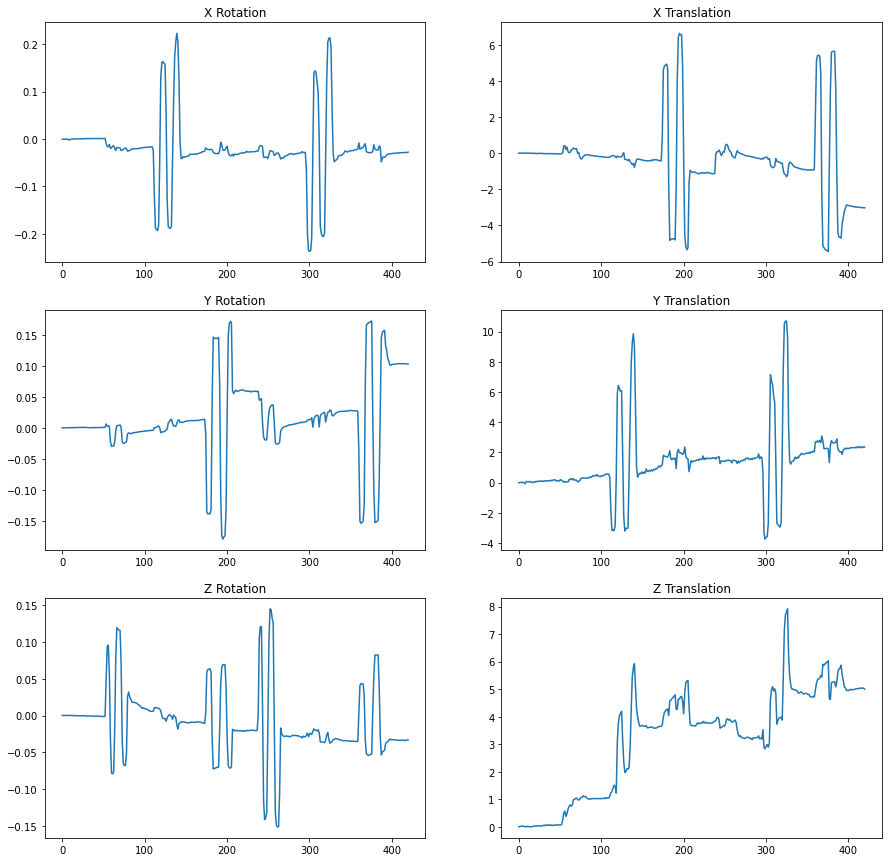

In [18]:
#Plot ground truth data for a single subject
data = ground_truth_dict["sub-NC254"]
fig, axs = plt.subplots(3, 2,figsize=(15,15))
axs[0, 0].plot(data.Time, data.X_Rotation)
axs[0, 0].set_title("X Rotation")
axs[0, 1].plot(data.Time,data.X_Translation)
axs[0, 1].set_title("X Translation")
axs[1, 0].plot(data.Time, data.Y_Rotation)
axs[1, 0].set_title("Y Rotation")
axs[1, 1].plot(data.Time,data.Y_Translation)
axs[1, 1].set_title("Y Translation")
axs[2, 0].plot(data.Time, data.Z_Rotation)
axs[2, 0].set_title("Z Rotation")
axs[2, 1].plot(data.Time,data.Z_Translation)
axs[2, 1].set_title("Z Translation")
                    